In [43]:
# All the Imported Module Here.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [3]:
# First i have One file that contain text and label (ham or spam). let's call it.
file = pd.read_csv(r'C:\Users\win 10\Downloads\Spam detection\sms.txt',header = None,names=['Label', 'Message'], sep='\t')
sms = pd.DataFrame(file)
sms.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#let's count no of ham and spam
sms.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [5]:
X = sms.Message
Y = sms.Label

In [6]:
# if you don't specify test_size default is 0.25
Xtrain,Xtest,Ytrain, Ytest = train_test_split(X,Y, test_size=0.30)

In [7]:
#Let's Prepare Our Model
vect = CountVectorizer()

#let's Train data
vect.fit(Xtrain)# making Dictionary
Xtrain_matrix = vect.transform(Xtrain)

In [27]:
print(
vect.fit(Xtrain)
)
print(vect.transform(Xtrain))

CountVectorizer()
  (0, 1500)	1
  (0, 2365)	1
  (0, 2450)	1
  (0, 3214)	1
  (0, 4588)	1
  (0, 4859)	1
  (0, 5600)	1
  (0, 5846)	1
  (0, 5896)	1
  (0, 6668)	1
  (0, 6707)	1
  (0, 6896)	1
  (0, 6941)	1
  (0, 7146)	1
  (1, 1)	1
  (1, 89)	1
  (1, 253)	1
  (1, 1410)	1
  (1, 1476)	1
  (1, 1682)	1
  (1, 1818)	1
  (1, 2312)	1
  (1, 2772)	1
  (1, 2948)	1
  (1, 3114)	1
  :	:
  (3899, 1180)	1
  (3899, 1764)	1
  (3899, 2212)	1
  (3899, 2772)	1
  (3899, 2925)	1
  (3899, 3122)	1
  (3899, 3184)	2
  (3899, 3259)	1
  (3899, 3844)	1
  (3899, 4302)	1
  (3899, 4485)	1
  (3899, 5184)	1
  (3899, 5809)	1
  (3899, 5810)	1
  (3899, 5919)	1
  (3899, 6147)	1
  (3899, 6261)	1
  (3899, 6332)	1
  (3899, 6431)	2
  (3899, 6467)	1
  (3899, 6843)	1
  (3899, 6956)	1
  (3899, 7001)	1
  (3899, 7146)	3
  (3899, 7150)	1


In [8]:
# for testing Data Make dictionary and matrix
Xtest_matrix = vect.transform(Xtest)

In [9]:
# make model, train Model
MNB = MultinomialNB()
MNB.fit(Xtrain_matrix, Ytrain)

MultinomialNB()

In [10]:
# now we have model,
# Let's Test Our Data
Ypredict = MNB.predict(Xtest_matrix)


In [15]:
MNB.score(Xtest_matrix,Ytest)


0.9856459330143541

In [ ]:
# Print message for False Positive(Actually it,ham but prediction is spam)
Xtest[(Ypredict == 'spam') &(Ytest == 'ham')]

In [24]:
# Print message for False Positive(Actually it,spam but prediction is ham)
Xtest[(Ypredict == 'ham') &(Ytest == 'spam')]

5449    Latest News! Police station toilet stolen, cop...
3419    LIFE has never been this much fun and great un...
2770    Burger King - Wanna play footy at a top stadiu...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
751     Do you realize that in about 40 years, we'll h...
4373    Ur balance is now £600. Next question: Complet...
1430    For sale - arsenal dartboard. Good condition b...
4676    Hi babe its Chloe, how r u? I was smashed on s...
4949    Hi this is Amy, we will be sending you a free ...
1500    SMS. ac JSco: Energy is high, but u may not kn...
1638    0A$NETWORKS allow companies to bill for SMS, s...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
5       FreeMsg Hey there darling it's been 3 week's n...
2663    Hello darling how are you today? I would love ...
5037    You won't believe it but it's true. It's Incre...
Name: Message, dtype: object

In [16]:
ResultDict = {
    'Actual':Ytest,
    'Predicted':Ypredict
}
Result = pd.DataFrame(ResultDict)

In [17]:
confusion_matrix(Ytest,Ypredict)

array([[1452,    9],
       [  15,  196]], dtype=int64)

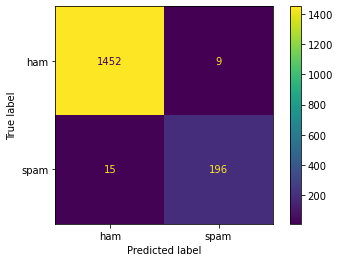

In [18]:
plot_confusion_matrix(MNB, Xtest_matrix, Ytest)
plt.show()

In [19]:
 # Now, we try Different algoritham, LogisticRegression

In [21]:
# import it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(Xtrain_matrix, Ytrain)
LR.predict(Xtest_matrix)
LR.score(Xtest_matrix,Ytest)

0.9796650717703349

In [31]:
# now Fine tune our model and improve model accuracy
# remove stop words like the, have, has, was,a etc
# you see that matrix size is reduce
vect1 = CountVectorizer(stop_words='english')
Xtrain1 = vect1.fit_transform(Xtrain)
Xtrain1

<3900x6921 sparse matrix of type '<class 'numpy.int64'>'
	with 30399 stored elements in Compressed Sparse Row format>

In [33]:
#now take another parameter
#ngram_range
# you see that matrix size is very large

vect2 = CountVectorizer(ngram_range=(1,2))
Xtrain2 = vect2.fit_transform(Xtrain)
Xtrain2
df = pd.DataFrame(Xtrain2.toarray(), columns=vect2.get_feature_names())
df

,00,00 in,00 per,00 sub,00 subs,000,000 bonus,000 cash,000 homeowners,000 pounds,...,zoe it,zogtorius,zogtorius ve,zyada,zyada kisi,èn,ú1,ú1 20,〨ud,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#now take another parameter
#max_df, min_df
# remove all the word that appear in more than 50%
vect3 = CountVectorizer(max_df=0.50)
Xtrain3 = vect3.fit_transform(Xtrain)
print(Xtrain3.shape)

# onle keep those word in dataframe min 2 times
vect4 = CountVectorizer(min_df=2)
Xtrain4 = vect4.fit_transform(Xtrain)
Xtrain4


(3900, 7183)


<3900x3336 sparse matrix of type '<class 'numpy.int64'>'
	with 48012 stored elements in Compressed Sparse Row format>

In [39]:
#now it's time to apply all the terms at a once
#for training data
vect_combined = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.5)
XtrainC = vect_combined.fit_transform(Xtrain)
XtrainC

<3900x6486 sparse matrix of type '<class 'numpy.int64'>'
	with 36466 stored elements in Compressed Sparse Row format>

In [40]:
# for Testing data
XtestC = vect_combined.transform(Xtest)

In [41]:
#now applying MultinomialNB algoritham
nb = MultinomialNB()
nb.fit(XtrainC, Ytrain)

MultinomialNB()

In [42]:
YpredictC = nb.predict(XtestC)

In [48]:
# our Old score is 0.9856459330143541
metrics.accuracy_score(Ytest, YpredictC)



0.9874401913875598

In [ ]:
# our Old score is 0.9856459330143541
# our new score is 0.9874401913875598
# little Improvement